### 4. مقایسه درآمد افرادی شهری در سال های 1400 و 1401

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def get_total_job_income(df, member_id):
    return df[df['Member_id'] == member_id]['netincome_w_y'].apply(to_int).sum()


def get_total_free_income(df, member_id):
    return df[df['Member_id'] == member_id]['income_s_y'].apply(to_int).sum()


def get_total_subsidy_income(df, member_id):
    return df[df['Member_id'] == member_id]['subsidy'].apply(to_int).sum()


def to_int(num):
    try:
        if type(num) == str:
            num = num.strip()
        return int(num)
    except Exception as e:
        return 0


def get_total_other_income(record):
    total_income = 0

    total_income += to_int(record['income_pension'])
    total_income += to_int(record['income_rent'])
    total_income += to_int(record['income_interest'])
    total_income += to_int(record['income_aid'])
    total_income += to_int(record['income_resale'])
    total_income += to_int(record['income_transfer'])

    return total_income


def get_total_income(df, member_id):
    return df[df['Member_id'] == member_id]['income'].apply(to_int).sum()


def calc_total_person_income(file_name):
    df_job_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S01')

    df_job_income = df_job_income[(~np.isnan(df_job_income['Address'])) & (~np.isnan(df_job_income['member']))]
    df_job_income['Member_id'] = df_job_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_job_income['income'] = df_job_income.apply(lambda r: get_total_job_income(df_job_income, r['Member_id']), axis=1)
    df_job_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_job_income = df_job_income[['Member_id', 'income']]

    df_free_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S02')

    df_free_income = df_free_income[(~np.isnan(df_free_income['Address'])) & (~np.isnan(df_free_income['member']))]
    df_free_income['Member_id'] = df_free_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_free_income['income'] = df_free_income.apply(lambda r: get_total_free_income(df_free_income, r['Member_id']), axis=1)
    df_free_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_free_income = df_free_income[['Member_id', 'income']]
    
    df_other_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S03')

    df_other_income.fillna(0, inplace=True)
    df_other_income = df_other_income[(~np.isnan(df_other_income['Address'])) & (~np.isnan(df_other_income['member']))]
    df_other_income['Member_id'] = df_other_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_other_income['income'] = df_other_income.apply(lambda r: get_total_other_income(r), axis=1)
    df_other_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_other_income = df_other_income[['Member_id', 'income']]
    
    df_subsidy_income = pd.read_excel(file_name, engine='openpyxl', sheet_name=file_name.split('.')[0] + 'P4S04')

    df_subsidy_income = df_subsidy_income[(~np.isnan(df_subsidy_income['Address'])) & (~np.isnan(df_subsidy_income['member']))]
    df_subsidy_income['Member_id'] = df_subsidy_income.apply(lambda r: str(r['Address']) + '_' + str(int(r['member'])), axis=1)
    df_subsidy_income['income'] = df_subsidy_income.apply(lambda r: get_total_subsidy_income(df_subsidy_income, r['Member_id']), axis=1)
    df_subsidy_income.drop_duplicates(subset=['Member_id'], inplace=True)
    df_subsidy_income = df_subsidy_income[['Member_id', 'income']]

    df_income = pd.concat([df_job_income, df_free_income, df_other_income, df_subsidy_income])
    
    return df_income

In [35]:
U1400 = calc_total_person_income('U1400.xlsx')
U1400_income = U1400.groupby('Member_id').agg({'income': 'sum'})
U1400_income = U1400_income['income'].values

In [36]:
U1401 = calc_total_person_income('U1401.xlsx')
U1401_income = U1401.groupby('Member_id').agg({'income': 'sum'})
U1401_income = U1401_income['income'].values

In [37]:
U1400_income.mean(), U1401_income.mean()

(235215582.0052185, 378516110.72378343)

همان طور که مشاهده می شود، میانگین درآمد افراد شهری در سال 1401 از سال 1400 بسیار بیشتر است اکنون واریانس آنها را بررسی میکنیم

In [38]:
U1400_income.std(), U1401_income.std()

(393554946.75185376, 615398339.4857981)

حالا میتوانیم توزیع میانگین دو سال متوالی رو بر روی دو نمودار جداگانه مشاهده کنیم که به شکل زیر خواهد بود

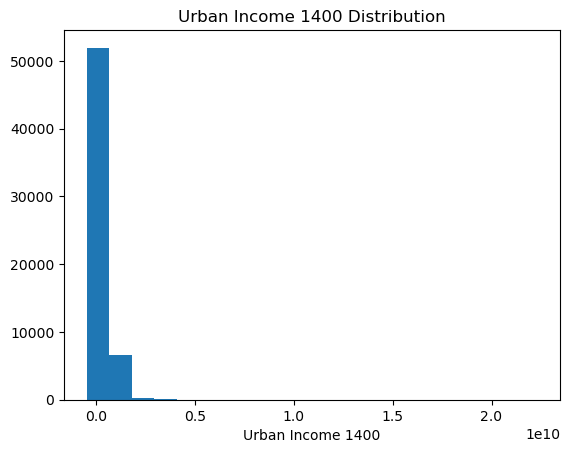

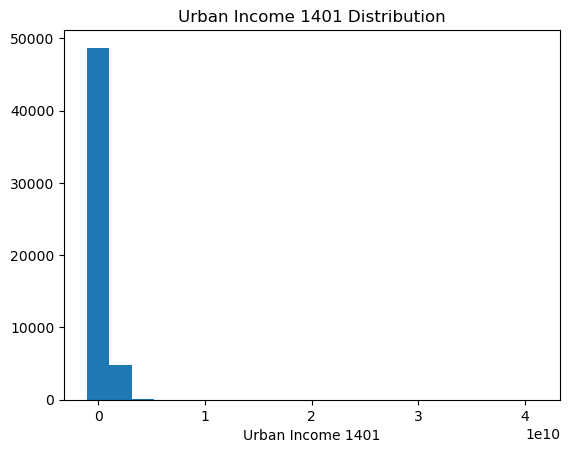

In [39]:
plt.hist(U1400_income, bins=20)
plt.xlabel('Urban Income 1400')
plt.title('Urban Income 1400 Distribution')
plt.show()
plt.hist(U1401_income, bins=20)
plt.xlabel('Urban Income 1401')
plt.title('Urban Income 1401 Distribution')
plt.show()

اکنون نمودار درآمد را برای هر سال جداگانه و زیر یکدیگر رسم می کنیم

C:\Users\a\AppData\Local\Temp\ipykernel_12120\1730996501.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(U1400_income, np.zeros_like(U1400_income) + 0, 'x', color='blue', marker='o', label='Urban income 1400')
C:\Users\a\AppData\Local\Temp\ipykernel_12120\1730996501.py:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(U1401_income, np.zeros_like(U1401_income) + 0, 'x', color='red', marker='o', label='Urban income 1401')


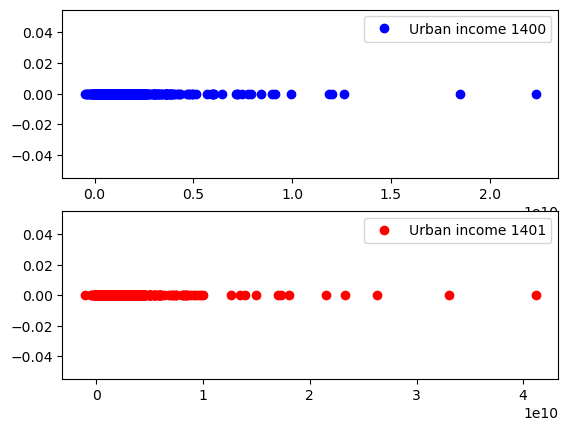

In [40]:
plt.subplot(2, 1, 1)
plt.plot(U1400_income, np.zeros_like(U1400_income) + 0, 'x', color='blue', marker='o', label='Urban income 1400')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(U1401_income, np.zeros_like(U1401_income) + 0, 'x', color='red', marker='o', label='Urban income 1401')
plt.legend()
plt.show()

از روی نمودار هم کمی میتوان مشاهده کرد که درآمد سال 1401 بیشتر از سال 1400 است. اکنون درآمد .واقعی سال 1401 را محاسبه می کنیم. فرض میکنیم درآمد سال 1400 درآمد خالص باشد
اکنون خالص درآمد افراد در سال 1401 را محاسبه کرده و میبینیم که میانگین کلی آنها کمی بالاتر از سال قبلی است

In [41]:
inflation_1401 =0.465
np.mean(U1400_income), np.mean(U1401_income / (1 + inflation_1401))

(235215582.0052185, 258372771.82510814)

In [42]:
len(U1400_income), len(U1401_income)

(58829, 53697)

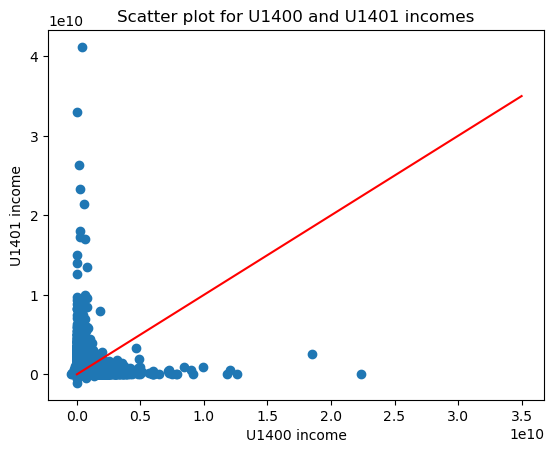

In [43]:
U1400_income_sample = U1400_income[:53697]

plt.scatter(U1400_income_sample, U1401_income)
plt.plot(np.arange(0, 4e10, step=5e9), np.arange(0, 4e10, step=5e9), color='red')
plt.xlabel('U1400 income')
plt.ylabel('U1401 income')
plt.title('Scatter plot for U1400 and U1401 incomes')
plt.show()

اگر تعداد نمونه ها که با یکدیگر مقایسه شده اند را داشته باشیم (53697) انگاه میتوان مشاهده کرد تعداد زوج مرتب های بالای نیمساز صفحه بیشتر از نصف است
و این همان فرضیه بیشتر بودن درآمد افراد شهری در سال 1401 نسبت به 1400 را تقویت می کند

In [44]:
list(u1 < u2 for u1, u2 in zip(U1400_income_sample, U1401_income)).count(True)

31528

طبق مشاهده نمونه های بالای خط نیمساز کمی بیشتر هستند. به همین دلیل باز هم میتوان نتیجه قبلی مبنی بر بیشتر بودن درآمد سال 1401 را تکرار کرد

مشاهده می کنیم با احتساب درآمد سال 1400 به عنوان درآمد حقیقی یک فرد، در سال بعد درآمد حقیقی با توجه نرخ تورم تقریبا برابر با درآمد سال قبل می شود و حتی کمی از آن نیز بیشتر است
این موضوع نیز خود نشان دهنده بیشتر بودن درآمد افراد شهری در سال 1401 نسبت به سال 1400 است

In [45]:
U1400_food_cost = pd.read_excel('U1400.xlsx', engine='openpyxl', sheet_name='U1400P3S01')
U1400_food_cost

,Address,code,purchased,gram,kilogram,price,value
0,10004004227,11112,1,NaN,10.0,250000.0,2500000.0
1,10004004227,11142,1,NaN,10.0,30000.0,300000.0
2,10004004227,11143,1,NaN,10.0,30000.0,300000.0
3,10004004227,11174,1,NaN,2.0,350000.0,700000.0
4,10004004227,11211,1,NaN,2.0,1300000.0,2600000.0
...,...,...,...,...,...,...,...
617702,13001375135,11424,1,NaN,2.0,150000.0,300000.0
617703,13001375135,11428,1,NaN,1.0,280000.0,280000.0
617704,13001375135,11441,1,NaN,2.0,250000.0,500000.0
617705,13001375135,11631,1,NaN,2.0,150000.0,300000.0


In [46]:
U1401_food_cost = pd.read_excel('U1401.xlsx', engine='openpyxl', sheet_name='U1401P3S01')
U1401_food_cost

,Address,code,purchased,gram,kilogram,price,value
0,12709339934,11812,1,NaN,2.0,300000,600000
1,12709339934,11823,1,500.0,NaN,800000,400000
2,12709339934,11841,1,500.0,NaN,500000,250000
3,12709339934,11842,1,NaN,NaN,0,200000
4,12709339934,11913,1,100.0,NaN,2000000,200000
...,...,...,...,...,...,...,...
591701,12709339928,11923,1,NaN,1.0,550000,550000
591702,12709339928,11928,1,500.0,NaN,700000,350000
591703,12709339928,12211,1,NaN,NaN,0,450000
591704,12709339928,12212,1,NaN,NaN,0,400000


In [47]:
U1400_food_cost['value'].mean(), U1401_food_cost['value'].mean()

(582344.9269004996, 939166.0683717928)

حتی هزینه مواد غذایی مصرفی و خوراکی مردم در سال 1401 نسبت به 1400 افزایش یافته است برای نوشیدنی ها نیز میتوان این امار را محاسبه کرد

In [48]:
U1400_drink_cost = pd.read_excel('U1400.xlsx', engine='openpyxl', sheet_name='U1400P3S02')
U1400_drink_cost

,Address,code,purchased,gram,kilogram,price,value
0,10011009729,22111,1,NaN,600.0,3500.0,2100000
1,10001001520,22113,1,NaN,150.0,5000.0,750000
2,10007007222,22111,1,NaN,600.0,4000.0,2400000
3,10005004635,22113,1,NaN,20.0,2500.0,50000
4,10009008530,22111,1,NaN,120.0,3750.0,450000
...,...,...,...,...,...,...,...
3202,13002381224,22111,1,NaN,150.0,5000.0,750000
3203,13002381227,22111,1,NaN,300.0,5000.0,1500000
3204,13006382726,22113,1,NaN,300.0,10000.0,3000000
3205,13006382732,22111,1,NaN,600.0,9000.0,5400000


In [49]:
U1401_drink_cost = pd.read_excel('U1401.xlsx', engine='openpyxl', sheet_name='U1401P3S02')
U1401_drink_cost

,Address,code,purchased,gram,kilogram,price,value
0,10001000635,22111,1,NaN,300.0,5000,1500000
1,10001000638,22111,1,NaN,600.0,5000,3000000
2,10001000641,22111,1,NaN,30.0,5000,150000
3,10001001125,22111,1,NaN,150.0,4000,600000
4,10001001527,22111,1,NaN,120.0,15000,1800000
...,...,...,...,...,...,...,...
3105,13005382241,22115,1,NaN,NaN,0,500000
3106,13006383038,22111,1,NaN,300.0,5000,1500000
3107,13006383826,22113,1,NaN,300.0,10000,3000000
3108,13006383835,22113,1,NaN,300.0,10000,3000000


In [50]:
U1400_drink_cost['value'].mean(), U1401_drink_cost['value'].mean()

(2106340.8169628936, 3088575.1607717043)

هزینه های نوشیدنی مصرفی مردم در سال 1401 نیز بسیار بیشتر از این هزینه های در سال قبلی بوده است
اکنون سرمایه گذاری های انجام شده توسط مردم در سال 1401 نسبت به 1400 را بررسی می کنیم

In [51]:
U1400_investment = pd.read_excel('U1400.xlsx', engine='openpyxl', sheet_name='U1400P3S14')
U1400_investment

,Address,code,purchased,value
0,10003003229,34126,1,20000000.0
1,10011009735,33214,1,20000000.0
2,10010009325,33214,1,130000000.0
3,10002002832,33214,1,300000000.0
4,10002002832,34181,1,10000000.0
...,...,...,...,...
2524,13001373129,33214,1,300000000.0
2525,13001373132,33190,1,160000000.0
2526,13001373135,33190,1,130000000.0
2527,13001373135,33214,1,150000000.0


In [52]:
U1401_investment = pd.read_excel('U1401.xlsx', engine='openpyxl', sheet_name='U1401P3S14')
U1401_investment

,Address,code,purchased,value
0,10001000230,33190,1,000300000000
1,10001000625,33190,1,000161750000
2,10001000632,33214,1,000070000000
3,10001001125,33190,1,000600000000
4,10001001132,33190,1,000240000000
...,...,...,...,...
2202,11403177926,33134,0,
2203,11803213331,33145,0,
2204,11803213341,34272,0,
2205,12602318841,33145,0,


In [53]:
U1400_investment['value'].apply(to_int).mean(), U1401_investment['value'].apply(to_int).mean()

(460081006.3266113, 562709392.8409606)

مشاهده می شود که هزینه های سرمایه گذاری بین افراد شهری در سال 1401 نسبت به سال قبل افزایش یافته است این موضوع در نمودار زیر نیز قابل مشاهده است

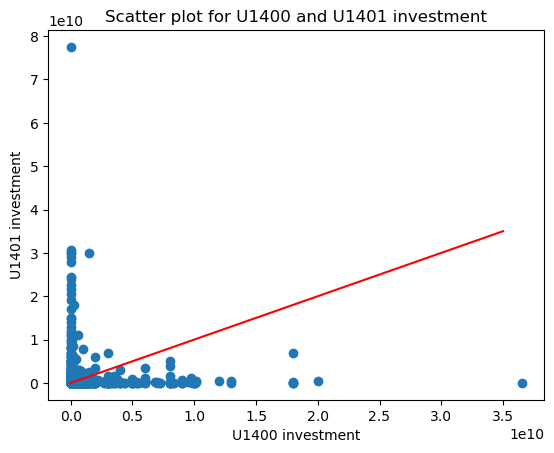

In [54]:
min_length = min(len(U1400_investment), len(U1401_investment))

plt.scatter(U1400_investment[:min_length]['value'].apply(to_int), U1401_investment[:min_length]['value'].apply(to_int))
plt.plot(np.arange(0, 4e10, step=5e9), np.arange(0, 4e10, step=5e9), color='red')
plt.xlabel('U1400 investment')
plt.ylabel('U1401 investment')
plt.title('Scatter plot for U1400 and U1401 investment')
plt.show()

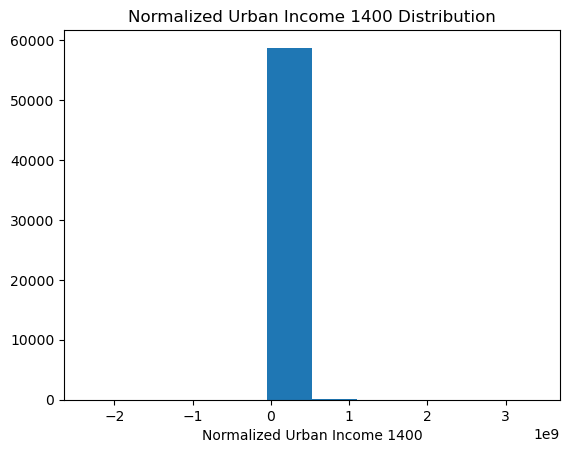

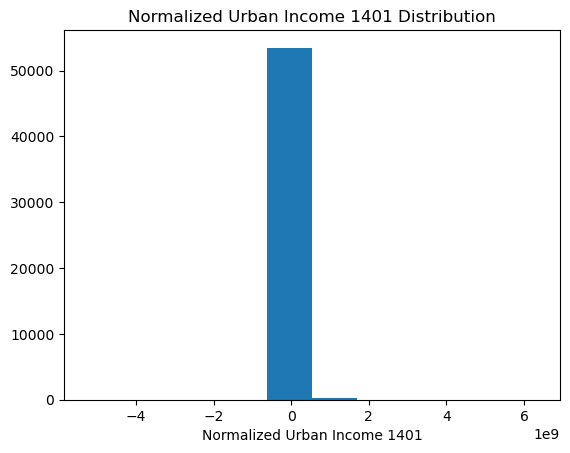

In [55]:
from scipy import stats

U1400_income_normal, _ = stats.yeojohnson(U1400_income)
U1401_income_normal, _ = stats.yeojohnson(U1401_income)

plt.hist(U1400_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1400')
plt.title('Normalized Urban Income 1400 Distribution')
plt.show()
plt.hist(U1401_income_normal, bins=10)
plt.xlabel('Normalized Urban Income 1401')
plt.title('Normalized Urban Income 1401 Distribution')
plt.show()

In [56]:
from scipy.stats import shapiro

shapiro(U1400_income_normal), shapiro(U1401_income_normal)

c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 58829.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\a\miniconda3\envs\quera\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 53697.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.6183707941270489, pvalue=4.8514647450574087e-138),
 ShapiroResult(statistic=0.5983127118107952, pvalue=3.982697200434836e-137))

چون داده های همچنان نرمال نیستند، پس باید از روش آماری دیگری برای بررسی این سوال استفاده کرد و چون داده ها از دو نمونه متفاوت بوده و به صورت ترتیبی نیستند، میتوان 
از تست آماری " من وایت" استفاده کرد

In [57]:
from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(U1400_income, U1401_income)
u_stat, p_value

(1281381182.0, 0.0)

چون مقدار پی برابر با صفر محاسبه شده است نشان می دهد که فرض اولیه ما اشتباه بوده است و در نتیجه درآمد این دو سوال در مناطق شهری با یکدیگر برابر نمی باشد